In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# All uploaded CSV file paths
file_paths = {
    "Casa Zimbabwe": "CasaZimbabwe_session1_group1_2025-05-05_15-18-30.csv",
    "Cloyne Court": "CloyneCourt_session1_group1_2025-05-05_18-48-51.csv",
    "Euclid Hall": "EuclidHall_session1_group1_2025-05-05_17-19-59.csv",
    "Hoyt Hall": "HoytHall_session1_group1_2025-05-07_13-12-41.csv",
    "Kidd Hall": "KiddHall_session1_group1_2025-05-05_16-08-27.csv",
    "Kingmann Hall": "KingmannHall_session1_group1_2025-05-07_13-48-47.csv",
    "Ridge House": "RidgeHouse_session1_group1_2025-05-05_17-58-10.csv",
    "Stebbins Hall": "StebbinsHall_session1_group1_2025-05-06_14-13-21.csv"
}

In [3]:
# Dictionary to store DataFrames
location_data = {}

In [20]:
Kingman = pd.read_csv("KingmannHall_session1_group1_2025-05-07_13-48-47.csv")
display(Kingman)

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.746651e+09,37.877088,-122.257477,23.0,28.2,43.4,46.2,22.339922,51.471427,1004.474877,73.316404,12535991.0
1,1.746651e+09,37.877088,-122.257477,18.4,28.2,43.4,46.2,22.333945,51.427759,1004.484153,73.238627,12535991.0
2,1.746651e+09,37.877088,-122.257477,18.4,28.2,43.4,46.2,22.333945,51.427759,1004.484153,73.238627,12535991.0
3,1.746651e+09,37.877087,-122.257446,22.0,28.2,43.4,46.2,22.323906,51.406288,1004.488036,73.206072,12535991.0
4,1.746651e+09,37.877087,-122.257465,45.2,29.0,42.0,45.4,22.305977,51.395161,1004.492510,73.168553,12535991.0
...,...,...,...,...,...,...,...,...,...,...,...,...
232,1.746652e+09,37.877136,-122.257423,20.8,22.0,39.4,41.4,21.849180,52.814751,1004.240593,75.280949,12535991.0
233,1.746652e+09,37.877137,-122.257439,19.2,19.4,35.2,36.4,21.849688,52.744954,1004.237664,75.305508,12535991.0
234,1.746652e+09,37.877130,-122.257432,23.0,19.4,35.2,36.4,21.851250,52.681669,1004.241297,75.275043,12535991.0
235,1.746652e+09,37.877130,-122.257432,23.2,20.0,33.8,34.8,21.853750,52.608375,1004.251982,75.185436,12535991.0


In [21]:
mean_VOC = Kingman['VOC'].mean()
print(mean_VOC)

12535991.0


In [6]:
# Load each file and store data
for location, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        df['Time'] = pd.to_datetime(df['Time'], unit='s')
        location_data[location] = df
    except Exception as e:
        print(f"Error reading {path}: {e}")

In [28]:
# Compute mean and std for each location
summary_data = []
N = 240 #Number of samples
for location, df in location_data.items():
    mean_counts = df['counts'].mean()
    std_counts = (df['counts'].std())/np.sqrt(N)
    mean_temp = df['Temperature'].mean()
    mean_pm25 = df['PM25'].mean()
    mean_pm1 = df['PM1'].mean()
    mean_pm10 =df['PM10'].mean()
    std_pm25 = df['PM25'].std()
    std_pm1 = df['PM1'].std()
    std_pm10 = df['PM10'].std()
    summary_data.append({
        'Location': location,
        'MeanCounts': mean_counts,
        'StdCounts': std_counts,
        'MeanTemp': mean_temp,
        'MeanPM25': mean_pm25,
        'StdPM25': std_pm25,
        'MeanPM1': mean_pm1,
        'StdPM1': std_pm1,
        'MeanPM10': mean_pm10,
        'StdPM10': std_pm10
    })

summary_df = pd.DataFrame(summary_data)
summary_df_sorted = summary_df.sort_values(by='MeanCounts', ascending=False).reset_index(drop=True)

# Table 1 - Print summary table in clean text format
print("\n--- Radiation Summary by Building (Sorted by Mean Counts) ---")
print(summary_df_sorted.to_string(index=False, 
      formatters={
          'MeanCounts': '{:.2f}'.format,
          'StdCounts': '{:.2f}'.format,
          'MeanTemp': '{:.2f}'.format,
          'MeanPM25': '{:.2f}'.format,
          'StdPM25': '{:.2f}'.format,
          'MeanPM1': '{:.2f}'.format,
          'StdPM1': '{:.2f}'.format,
          'MeanPM10': '{:.2f}'.format,
          'StdPM10': '{:.2f}'.format
      }))


--- Radiation Summary by Building (Sorted by Mean Counts) ---
     Location MeanCounts StdCounts MeanTemp MeanPM25 StdPM25 MeanPM1 StdPM1 MeanPM10 StdPM10
    Kidd Hall      33.66      0.24    25.73     2.78    0.56    1.73   0.47     3.11    0.87
 Cloyne Court      28.07      0.16    26.56     5.96    1.00    3.36   0.64     7.32    1.40
  Euclid Hall      27.70      0.15    27.82     4.60    0.86    2.99   0.56     5.49    1.26
Stebbins Hall      26.82      0.15    23.35    14.37    2.16    7.91   0.97    17.74    2.70
Casa Zimbabwe      25.71      0.14    30.09     2.55    0.73    1.49   0.64     2.89    0.86
  Ridge House      24.46      0.17    26.23     4.83    0.86    2.84   0.67     5.96    1.18
    Hoyt Hall      23.18      0.18    20.88     8.27    1.45    4.59   0.80     9.61    1.72
Kingmann Hall      21.74      0.19    21.89    43.15    3.22   27.15   2.19    46.12    3.87


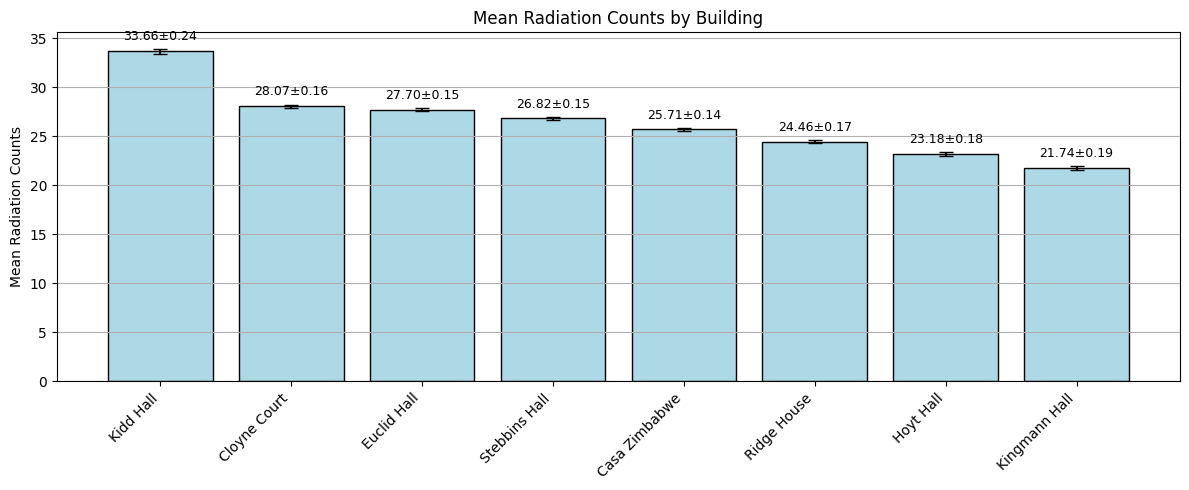

In [8]:
# Plot 1: Mean Radiation Counts with Error Bars + Labels
plt.figure(figsize=(12, 5))
bars = plt.bar(summary_df_sorted['Location'], summary_df_sorted['MeanCounts'],
               yerr=summary_df_sorted['StdCounts'], capsize=5,
               color='lightblue', edgecolor='black')

# Add numeric labels above bars
for bar, mean, std in zip(bars, summary_df_sorted['MeanCounts'], summary_df_sorted['StdCounts']):
    y = bar.get_height()
    label = f"{mean:.2f}±{std:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.8, label, ha='center', va='bottom', fontsize=9)

plt.ylabel("Mean Radiation Counts")
plt.title("Mean Radiation Counts by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('MeanRadiationCountsbyBuilding', dpi=300, bbox_inches = 'tight')
plt.show()

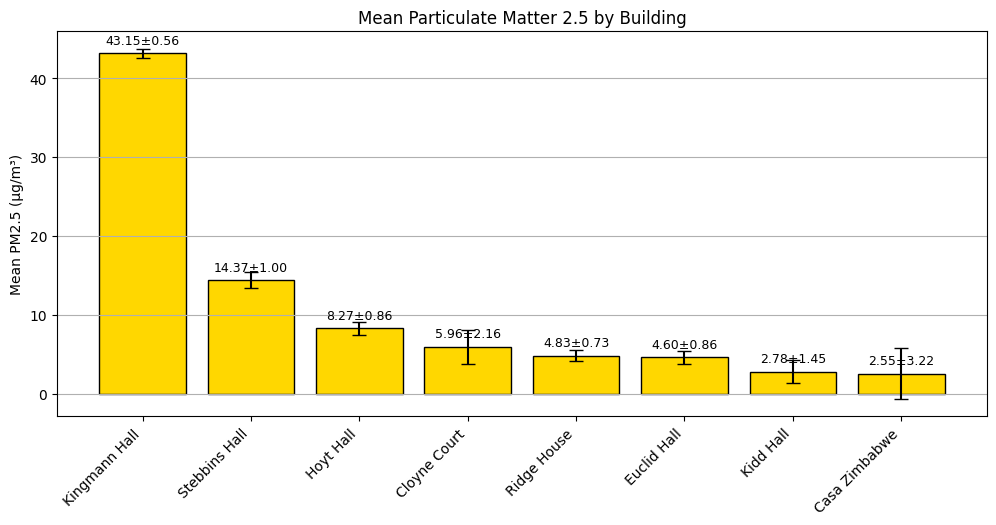

In [41]:
#PM Plots
summary_df_cv_pm25sorted = summary_df.sort_values(by='MeanPM25', ascending=False)
# PM Plots: with Error Bars + Labels
plt.figure(figsize=(12, 5))
bars = plt.bar(summary_df_cv_pm25sorted['Location'], summary_df_cv_pm25sorted['MeanPM25'],
               yerr=summary_df_sorted['StdPM25'], capsize=5,
               color='gold', edgecolor='black')

# Add numeric labels above bars
for bar, mean, std in zip(bars, summary_df_cv_pm25sorted['MeanPM25'], summary_df_sorted['StdPM25']):
    y = bar.get_height()
    label = f"{mean:.2f}±{std:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.8, label, ha='center', va='bottom', fontsize=9)

plt.ylabel("Mean PM2.5 (µg/m³)")
plt.title("Mean Particulate Matter 2.5 by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.savefig('PM25', dpi=300, bbox_inches = 'tight')
plt.show()

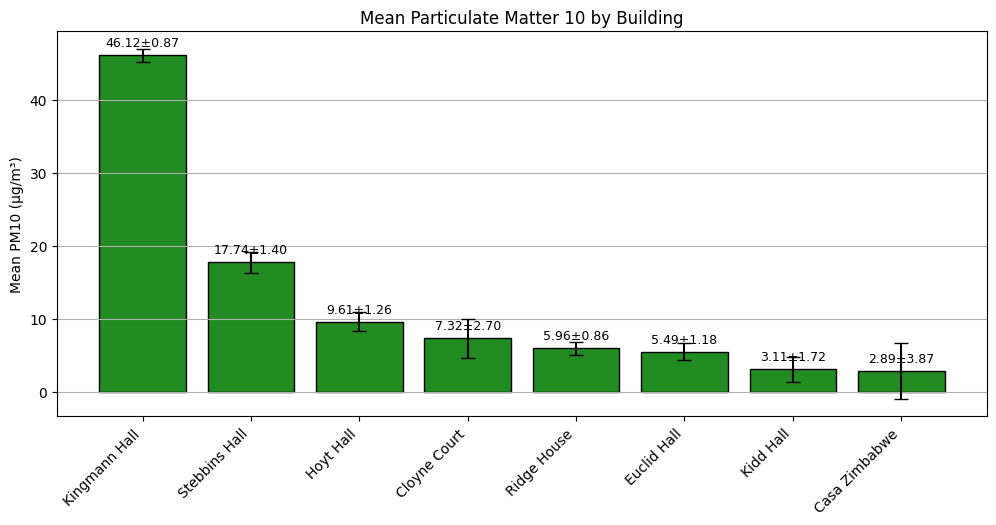

In [42]:
#PM Plots
summary_df_cv_pm10sorted = summary_df.sort_values(by='MeanPM10', ascending=False)
# PM Plots: with Error Bars + Labels
plt.figure(figsize=(12, 5))
bars = plt.bar(summary_df_cv_pm10sorted['Location'], summary_df_cv_pm10sorted['MeanPM10'],
               yerr=summary_df_sorted['StdPM10'], capsize=5,
               color='forestgreen', edgecolor='black')

# Add numeric labels above bars
for bar, mean, std in zip(bars, summary_df_cv_pm10sorted['MeanPM10'], summary_df_sorted['StdPM10']):
    y = bar.get_height()
    label = f"{mean:.2f}±{std:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.8, label, ha='center', va='bottom', fontsize=9)

plt.ylabel("Mean PM10 (µg/m³)")
plt.title("Mean Particulate Matter 10 by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.savefig('PM10', dpi=300, bbox_inches = 'tight')
plt.show()

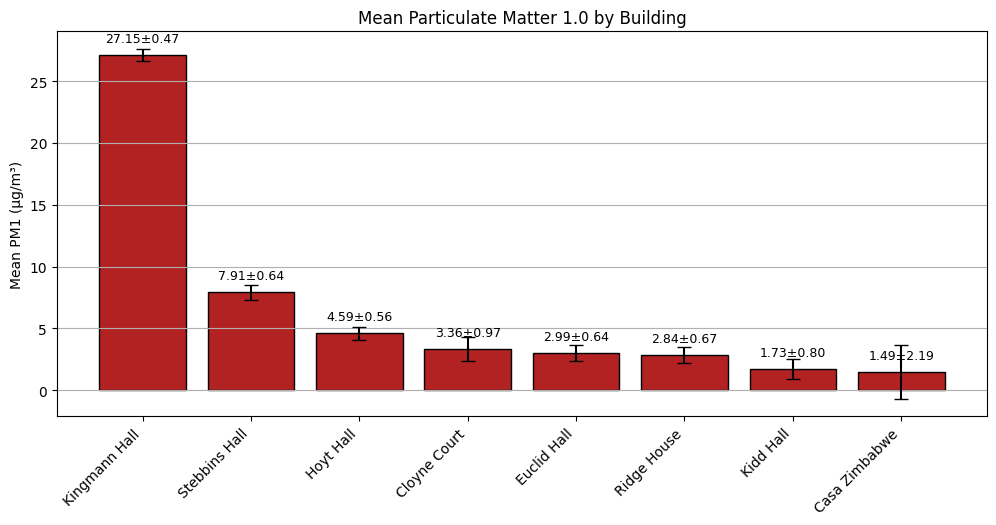

In [43]:
#PM Plots
summary_df_cv_pm1sorted = summary_df.sort_values(by='MeanPM1', ascending=False)
# PM Plots: with Error Bars + Labels
plt.figure(figsize=(12, 5))
bars = plt.bar(summary_df_cv_pm1sorted['Location'], summary_df_cv_pm1sorted['MeanPM1'],
               yerr=summary_df_sorted['StdPM1'], capsize=5,
               color='firebrick', edgecolor='black')

# Add numeric labels above bars
for bar, mean, std in zip(bars, summary_df_cv_pm1sorted['MeanPM1'], summary_df_sorted['StdPM1']):
    y = bar.get_height()
    label = f"{mean:.2f}±{std:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.8, label, ha='center', va='bottom', fontsize=9)

plt.ylabel("Mean PM1 (µg/m³)")
plt.title("Mean Particulate Matter 1.0 by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.savefig('PM1', dpi=300, bbox_inches = 'tight')
plt.show()

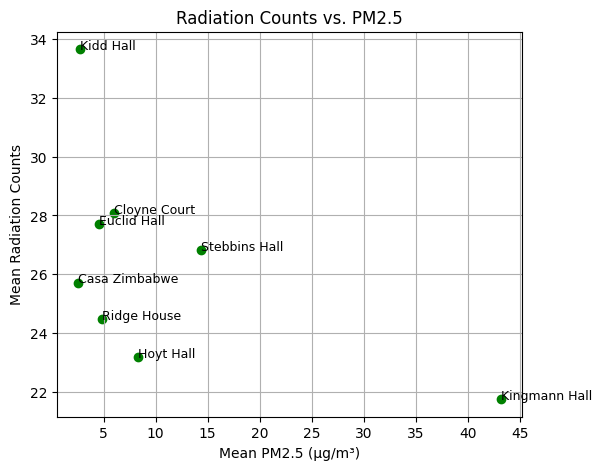

In [22]:
# Plot 2: Radiation Count vs. PM2.5
plt.figure(figsize=(6, 5))
plt.scatter(summary_df['MeanPM25'], summary_df['MeanCounts'], color='green')
for i, row in summary_df.iterrows():
    plt.text(row['MeanPM25'], row['MeanCounts'], row['Location'], fontsize=9)
plt.xlabel("Mean PM2.5 (µg/m³)")
plt.ylabel("Mean Radiation Counts")
plt.title("Radiation Counts vs. PM2.5")
plt.grid(True)
# plt.tight_layout()
plt.savefig('RadiationCountsvsPM25', dpi=300, bbox_inches = 'tight')
plt.show()

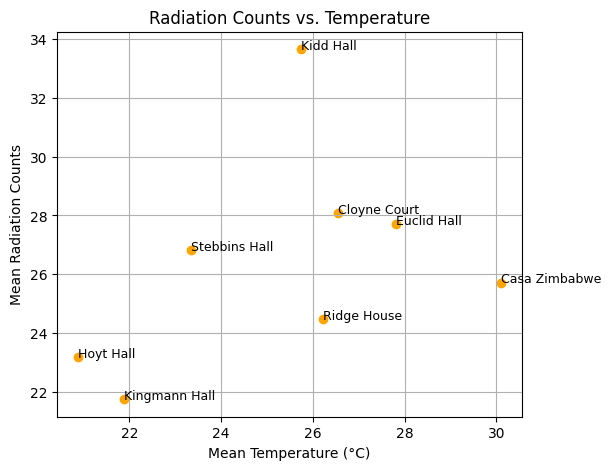

In [23]:
# Plot 3: Radiation Count vs. Temperature
plt.figure(figsize=(6, 5))
plt.scatter(summary_df['MeanTemp'], summary_df['MeanCounts'], color='orange')
for i, row in summary_df.iterrows():
    plt.text(row['MeanTemp'], row['MeanCounts'], row['Location'], fontsize=9)
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Mean Radiation Counts")
plt.title("Radiation Counts vs. Temperature")
plt.grid(True)
# plt.tight_layout()
plt.savefig('RadiationCountsvsTemperature', dpi=300, bbox_inches = 'tight')
plt.show()

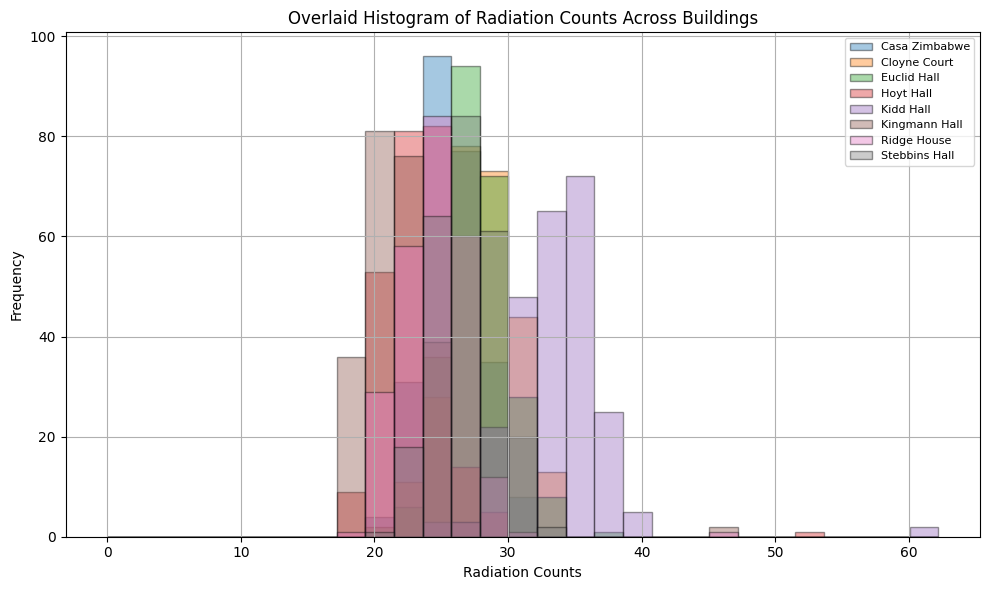

In [11]:
# Plot 4: Histogram Comparison of Radiation Counts Across Buildings 

# Plot 4 - OPTION 1: Overlaid histogram (with transparency)
plt.figure(figsize=(10, 6))
bins = np.linspace(0, max(df['counts'].max() for df in location_data.values()), 30)

for location, df in location_data.items():
    plt.hist(df['counts'], bins=bins, alpha=0.4, label=location, edgecolor='black')

plt.xlabel("Radiation Counts")
plt.ylabel("Frequency")
plt.title("Overlaid Histogram of Radiation Counts Across Buildings")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.savefig('HistogramComparisonofRadiationCounts', dpi=300, bbox_inches = 'tight')
plt.show()

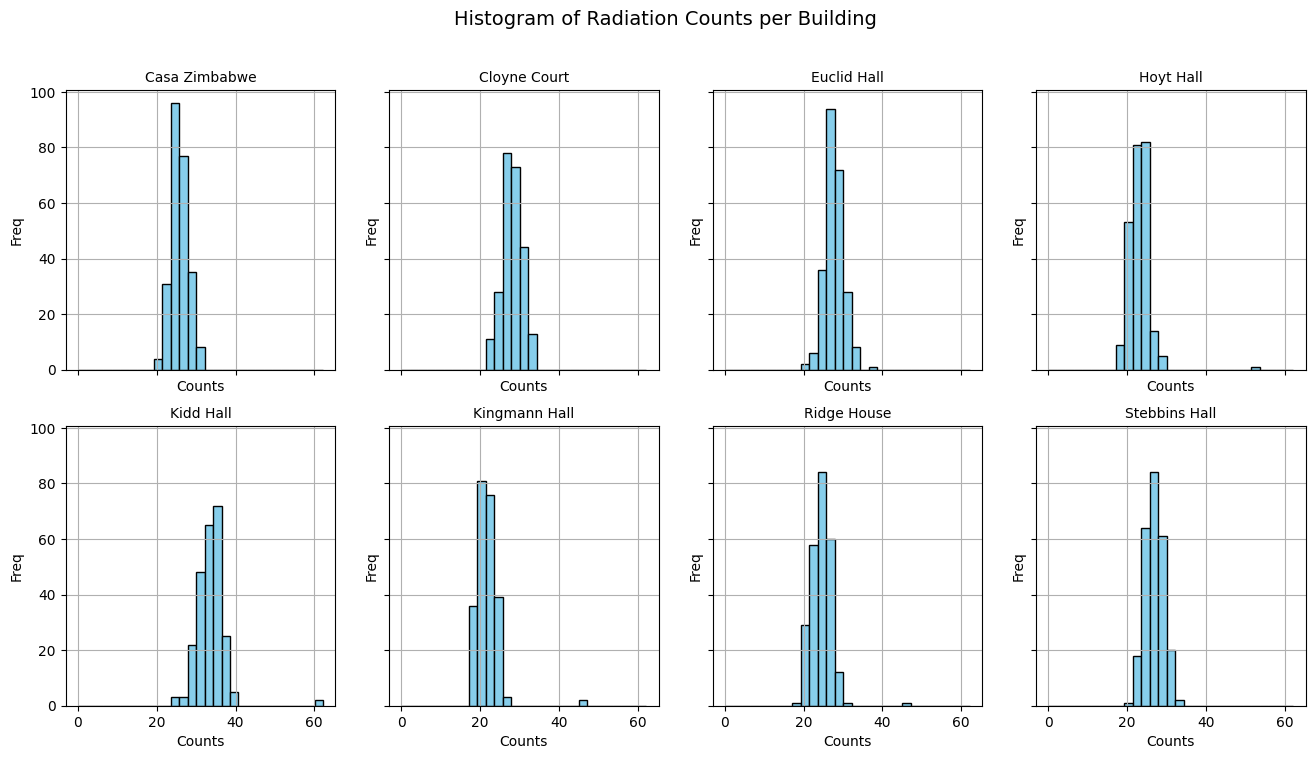

[ 0.          2.14482759  4.28965517  6.43448276  8.57931034 10.72413793
 12.86896552 15.0137931  17.15862069 19.30344828 21.44827586 23.59310345
 25.73793103 27.88275862 30.02758621 32.17241379 34.31724138 36.46206897
 38.60689655 40.75172414 42.89655172 45.04137931 47.1862069  49.33103448
 51.47586207 53.62068966 55.76551724 57.91034483 60.05517241 62.2       ]


In [44]:
# Plot 4 - OPTION 2: Faceted histograms (2 rows x 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()
bins = np.linspace(0, max(df['counts'].max() for df in location_data.values()), 30)

for ax, (location, df) in zip(axes, location_data.items()):
    ax.hist(df['counts'], bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(location, fontsize=10)
    ax.set_xlabel("Counts")
    ax.set_ylabel("Freq")
    ax.grid(True)

plt.suptitle("Histogram of Radiation Counts per Building", fontsize=14)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('HistogramRadiationCountsperBuilding', dpi=300, bbox_inches = 'tight')
plt.show()
print(bins)


--- Coefficient of Variation (CV) for Radiation Counts ---
     Location MeanCounts StdCounts CV_Counts
Kingmann Hall      21.74      0.19     0.009
    Hoyt Hall      23.18      0.18     0.008
    Kidd Hall      33.66      0.24     0.007
  Ridge House      24.46      0.17     0.007
 Cloyne Court      28.07      0.16     0.006
Stebbins Hall      26.82      0.15     0.005
  Euclid Hall      27.70      0.15     0.005
Casa Zimbabwe      25.71      0.14     0.005


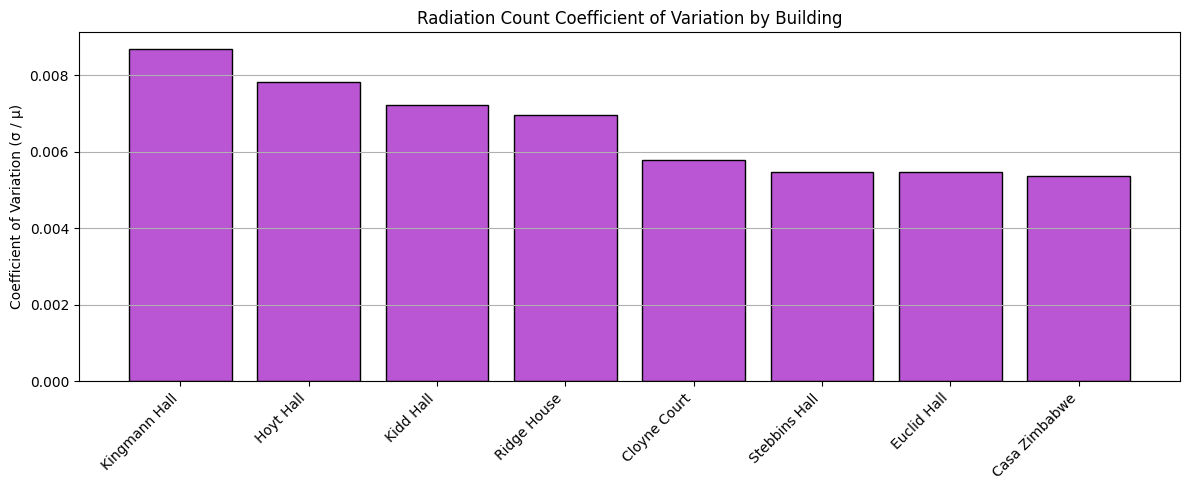

In [13]:
# Table 2 - Coefficient of Variation (CV) for Radiation Counts

# Calculate CV = std / mean for each building
summary_df['CV_Counts'] = summary_df['StdCounts'] / summary_df['MeanCounts']

# Sort by CV for better readability in the plot
summary_df_cv_sorted = summary_df.sort_values(by='CV_Counts', ascending=False)

# Print CV values
print("\n--- Coefficient of Variation (CV) for Radiation Counts ---")
print(summary_df_cv_sorted[['Location', 'MeanCounts', 'StdCounts', 'CV_Counts']].to_string(
    index=False,
    formatters={
        'MeanCounts': '{:.2f}'.format,
        'StdCounts': '{:.2f}'.format,
        'CV_Counts': '{:.3f}'.format
    }
))

# Plot 6 - Bar chart of CV
plt.figure(figsize=(12, 5))
plt.bar(summary_df_cv_sorted['Location'], summary_df_cv_sorted['CV_Counts'],
        color='mediumorchid', edgecolor='black')
plt.ylabel("Coefficient of Variation (σ / μ)")
plt.title("Radiation Count Coefficient of Variation by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('CoefficientofVariation', dpi=300, bbox_inches = 'tight')
plt.show()

In [14]:
from scipy.stats import f_oneway, kruskal

# Table 3 - Statistical Significance Tests on Radiation Counts

# Collect radiation counts grouped by location
radiation_groups = [df['counts'].values for df in location_data.values()]
locations = list(location_data.keys())

# Perform One-Way ANOVA (parametric test)
anova_stat, anova_p = f_oneway(*radiation_groups)

# Perform Kruskal-Wallis Test (non-parametric)
kruskal_stat, kruskal_p = kruskal(*radiation_groups)

# Store and convert results to native Python types
anova_result = {
    "Test": "One-Way ANOVA",
    "F-Statistic": float(anova_stat),
    "p-Value": float(anova_p),
    "Significant": bool(anova_p < 0.05)
}

kruskal_result = {
    "Test": "Kruskal-Wallis",
    "H-Statistic": float(kruskal_stat),
    "p-Value": float(kruskal_p),
    "Significant": bool(kruskal_p < 0.05)
}

# Print results in a readable format
print("\n--- Statistical Significance Tests for Radiation Counts ---")
print(f"{anova_result['Test']}:")
print(f"  F-Statistic = {anova_result['F-Statistic']:.2f}")
print(f"  p-Value     = {anova_result['p-Value']:.4e}")
print(f"  Significant = {anova_result['Significant']}\n")

print(f"{kruskal_result['Test']}:")
print(f"  H-Statistic = {kruskal_result['H-Statistic']:.2f}")
print(f"  p-Value     = {kruskal_result['p-Value']:.4e}")
print(f"  Significant = {kruskal_result['Significant']}")


--- Statistical Significance Tests for Radiation Counts ---
One-Way ANOVA:
  F-Statistic = 441.93
  p-Value     = 0.0000e+00
  Significant = True

Kruskal-Wallis:
  H-Statistic = 1248.80
  p-Value     = 1.9735e-265
  Significant = True


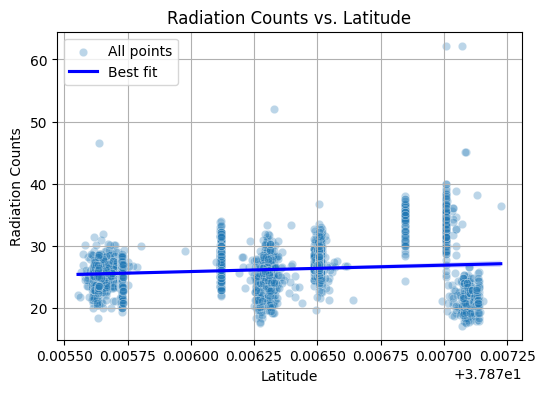

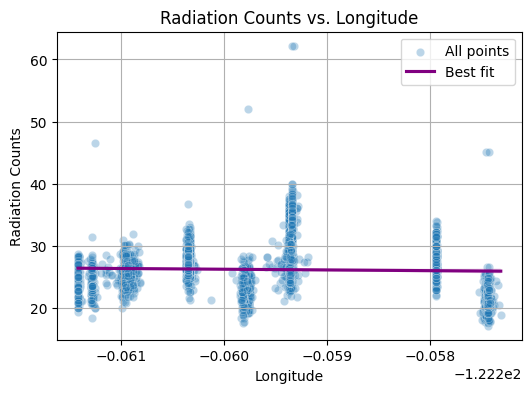


--- Spearman Correlation (Outliers Removed) ---
Latitude vs. Counts: ρ = 0.044, p = 0.0513
Longitude vs. Counts: ρ = 0.041, p = 0.0698


In [19]:
# Combine all raw data
import seaborn as sns #For ScatterPlots
from scipy import stats #For p and rho value in correlation
combined_df = pd.concat(location_data.values(), ignore_index=True)
combined_df_clean = combined_df.dropna(subset=['Latitude', 'Longitude', 'counts'])

# Outlier removal using IQR method on radiation counts ---
Q1 = combined_df_clean['counts'].quantile(0.25)
Q3 = combined_df_clean['counts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create filtered subset excluding outliers
filtered_df = combined_df_clean[(combined_df_clean['counts'] >= lower_bound) & 
                                 (combined_df_clean['counts'] <= upper_bound)]

# Plot 7: Counts vs. Latitude 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df_clean, x='Latitude', y='counts', alpha=0.3, label='All points')
sns.regplot(data=filtered_df, x='Latitude', y='counts', scatter=False, color='blue', label='Best fit')
plt.title("Radiation Counts vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Radiation Counts")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.savefig('CountsvsLattitude', dpi=300, bbox_inches = 'tight')
plt.show()

# Plot 8: Counts vs. Longitude 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df_clean, x='Longitude', y='counts', alpha=0.3, label='All points')
sns.regplot(data=filtered_df, x='Longitude', y='counts', scatter=False, color='purple', label='Best fit')
plt.title("Radiation Counts vs. Longitude")
plt.xlabel("Longitude")
plt.ylabel("Radiation Counts")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.savefig('CountsvsLongitude', dpi=300, bbox_inches = 'tight')
plt.show()

# Correlation on filtered data
lat_corr, lat_p = stats.spearmanr(filtered_df['Latitude'], filtered_df['counts'])
lon_corr, lon_p = stats.spearmanr(filtered_df['Longitude'], filtered_df['counts'])

print("\n--- Spearman Correlation (Outliers Removed) ---")
print(f"Latitude vs. Counts: ρ = {lat_corr:.3f}, p = {lat_p:.4f}")
print(f"Longitude vs. Counts: ρ = {lon_corr:.3f}, p = {lon_p:.4f}")